In [1]:
from pathlib import Path

import torch
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scipy import interpolate

import project_path
import nn.utils as utils
import nn.model.net as net
import nn.model.data as data
import nn.model.loss as loss

In [2]:
import torch.nn as nn
import torch.nn.functional as F

In [25]:
model = net.ConstituentNetPerceiverRecurrent(embbed_dim=16, num_embbeds=32, num_heads=1, num_latent_heads=1, num_perceivers=5, num_latent_transformers=1, self_attention=True)

In [26]:
utils.count_parameters(model)

9925

In [20]:
model = torch.jit.load('../experiments/constituent_perceiver_recurrent/last.script.pth')
utils.count_parameters(model)

11045

In [59]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=5e-3, steps_per_epoch=100, epochs=10, pct_start=0.2, div_factor=30, final_div_factor=1e4)

In [60]:
lrs = []
for _ in range(10):
    for _ in range(100):
        optimizer.step()
        lrs.append(optimizer.param_groups[0]['lr'])
        scheduler.step()

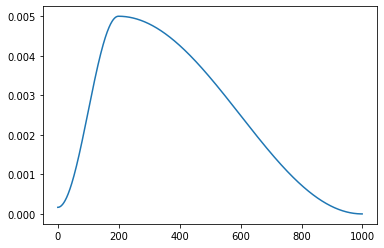

In [61]:
plt.plot(lrs)

In [62]:
5e-3/30

0.00016666666666666666

In [21]:
import h5py

In [22]:
file = h5py.File('../data/processed/train-val/jetImage_7_100p_0_10000.h5')

In [23]:
file['jets']

<HDF5 dataset "jets": shape (10000, 59), type "<f8">

In [12]:
for feature_name, feature in file.items():
    print(feature_name)

In [3]:
# (1) creating dataset
datasets = data.get_dataset(splits=['train-val', 'test'])
dataset = datasets['train-val']
test_set = datasets['test']

In [72]:
dataset_size = len(dataset)
train_set, val_set, _ = torch.utils.data.random_split(dataset, [dataset_size - 10000, 10000, 0])

In [73]:
train_loader = data.DataLoader(train_set, batch_size=32, shuffle=True, collate_fn=data.get_collate_fn())


In [ ]:
for sample in train_loader:
    print('ok')
    

In [4]:
len(dataset)

860000